In [3]:
# 1) Importing needed packages
import pandas as pd    # data loading
import matplotlib.pyplot as plt  # plotting
import seaborn as sns   # heatmap / visualization

from sklearn.model_selection import train_test_split   # train/test split
from sklearn.preprocessing import StandardScaler       # scaling for KNN
from sklearn.neighbors import KNeighborsClassifier     # KNN model
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation

In [4]:
df = pd.read_csv("DatasetofDiabetes.csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


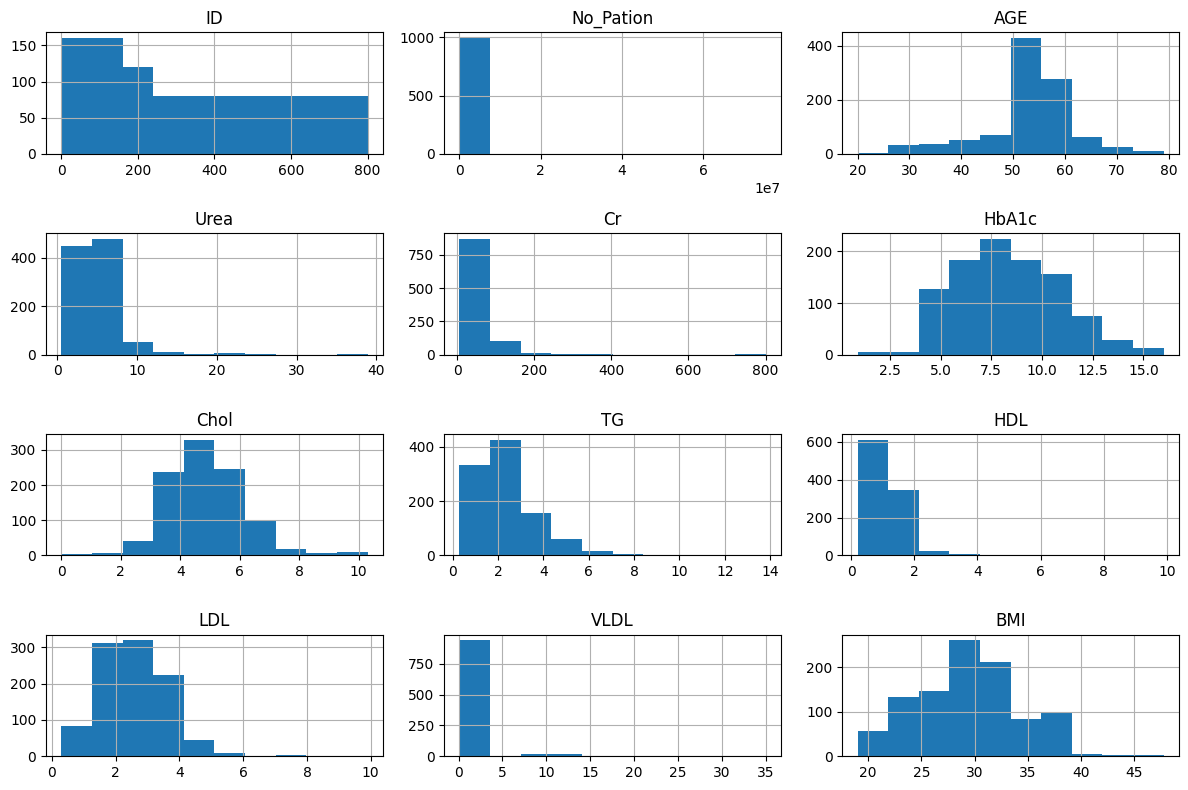

In [6]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [7]:
# Drop unneeded column
df = df.drop(columns=["ID"])

# Encode Gender
df["Gender"] = df["Gender"].astype(str).str.strip()
df["Gender"], _ = pd.factorize(df["Gender"])

# Encode CLASS automatically
df["CLASS"] = df["CLASS"].astype(str).str.strip()
df["CLASS"], class_names = pd.factorize(df["CLASS"])

df["CLASS"].unique(), df["CLASS"].isnull().sum()

(array([0, 1, 2]), np.int64(0))

In [8]:
X = df.drop(columns=["CLASS"])
y = df["CLASS"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
k_values = [3, 5, 7]
accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[k] = acc
    print(f"K={k}, Accuracy={acc:.4f}")

K=3, Accuracy=0.9300
K=5, Accuracy=0.9450
K=7, Accuracy=0.9550


Best K = 7
Final Accuracy: 0.955


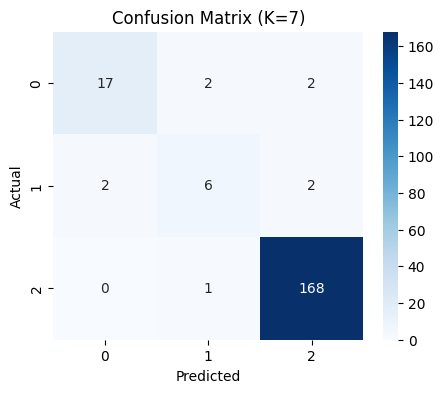

In [10]:
best_k = max(accuracies, key=accuracies.get)
print("Best K =", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()